<a href="https://colab.research.google.com/github/Sukyeong02/24-1-AI/blob/main/10_%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5_(1)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import math
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
from skimage.transform import resize

count = 0
cap = cv2.VideoCapture('/content/drive/MyDrive/24-1학기 코딩 수업/인공지능/Lecture 10/Tom and Jerry.mp4')
frameRate = cap.get(5)
x=1
while(cap.isOpened()):
    frameId = cap.get(1)
    ret, frame = cap.read()
    if (ret != True):
      break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [ ]:
count = 0
cap = cv2.VideoCapture('/content/drive/MyDrive/24-1학기 코딩 수업/인공지능/Lecture 10/Tom and Jerry 3.mp4')
frameRate = cap.get(5)
x=1
while(cap.isOpened()):
    frameId = cap.get(1)
    ret, frame = cap.read()
    if (ret != True):
      break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/24-1학기 코딩 수업/인공지능/Lecture 10/mapping.csv')
test = pd.read_csv('/content/drive/MyDrive/24-1학기 코딩 수업/인공지능/Lecture 10/testing.csv')

In [ ]:
X = [ ]
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)
X = np.array(X)

test_image = []
for img_name in test.Image_ID:
  img = plt.imread('' + img_name)
  test_image.append(img)
test_img = np.array(test_image)

from keras.utils import to_categorical
train_y = to_categorical(data.Class)
test_y = to_categorical(test.Class)

image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224,3)).astype(int)
    image.append(a)
X = np.array(image)

test_image = []
for i in range(0,test_img.shape[0]):
  a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
  test_image.append(a)
test_image = np.array(test_image)

In [ ]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X)
test_image = preprocess_input(test_image)

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, train_y, test_size=0.3, random_state=42)

from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

base_model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
test_image = base_model.predict(test_image)

X_train = X_train.reshape(208, 7*7*512)
X_valid = X_valid.reshape(90, 7*7*512)
test_image = test_image.reshape(186, 7*7*512)

train = X_train/X_train.max()
X_valid = X_valid/X_valid.max()
test_image = test_image/test_image.max()
print("Done!")

6/6 [==============================] - 1s 125ms/step
Done!


In [ ]:
model = Sequential()
model.add(InputLayer((7*7*512,)))
model.add(Dense(units=1024, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

from keras.callbacks import ModelCheckpoint
filepath = 'weights.best.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only = True, mode='min')

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

history = model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint])
print("Done2")

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 1.2899 - accuracy: 0.4135
Epoch 1: val_loss improved from inf to 1.09688, saving model to weights.best.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 6s 249ms/step - loss: 1.2899 - accuracy: 0.4135 - val_loss: 1.0969 - val_accuracy: 0.3667
Epoch 2/100
6/7 [========================>.....] - ETA: 0s - loss: 1.1389 - accuracy: 0.4323
Epoch 2: val_loss did not improve from 1.09688
7/7 [==============================] - 0s 20ms/step - loss: 1.1396 - accuracy: 0.4375 - val_loss: 1.1077 - val_accuracy: 0.3889
Epoch 3/100
6/7 [========================>.....] - ETA: 0s - loss: 1.1760 - accuracy: 0.4375
Epoch 3: val_loss improved from 1.09688 to 0.99583, saving model to weights.best.hdf5
7/7 [==============================] - 1s 182ms/step - loss: 1.1702 - accuracy: 0.4375 - val_loss: 0.9958 - val_accuracy: 0.6000
Epoch 4/100
5/7 [====================>.........] - ETA: 0s - loss: 1.0587 - accuracy: 0.4563
Epoch 4: val_loss improved from 0.99583 to 0.94956, saving model to weights.best.hdf5
7/7 [==============================] - 1s 205ms/step - loss: 1.0625 - accuracy: 0.4615 - val_loss: 0.9496 - val_accu

6/6 [==============================] - 0s 5ms/step - loss: 1.8908 - accuracy: 0.5860
Real Test accuracy: 58.60%
6/6 [==============================] - 0s 4ms/step
The screen time of None is  94 seconds
The screen time of Jerry is  0 seconds
The screen time of Tom is  92 seconds


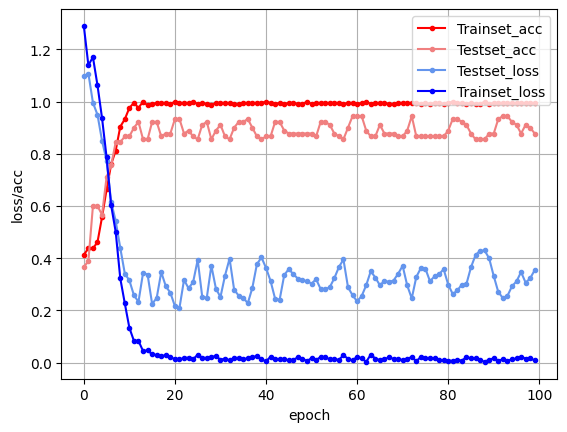

In [ ]:
scores = model.evaluate(test_image, test_y)
print('Real Test %s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

predictions = np.argmax(model.predict(test_image), axis=1)
print('The screen time of None is ', predictions[predictions==0].shape[0], 'seconds')
print('The screen time of Jerry is ', predictions[predictions==1].shape[0], 'seconds')
print('The screen time of Tom is ', predictions[predictions==2].shape[0], 'seconds')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()